<a href="https://colab.research.google.com/github/sachin21398/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Play Store App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

In this project, I have analyze Google Play Store data.This study is my first data analyzing study in Python.



Let's take a look at the data, which consists of two files:

**playstore data.csv:** contains all the details of the applications on Google Play. There are 13 features that describe a given app.
**user_reviews.csv:** contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.


# **GitHub Link -**

https://github.com/sachin21398/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_.ipynb

# **Problem Statement**


1. What are the top categories on Play Store?
2. What is the ratio of number of Paid or Free?
3. How importance is the rating of the application?
4. Which categories from the audience should the app be based on?
5. Which category has the most no. of installations?
6. How does the last update has an effect on the rating?
7. How are ratings affected when the app is a paid one?
8. How are reviews and ratings co-related?
9. Distribution of apps based on its size
10. Lets us discuss the sentiment subjectivity.
10. Is subjectivity and polarity proportional to each other?
11. What is the percentage of review sentiments?
12. How is sentiment polarity varying for paid and free apps?


#### **Define Your Business Objective?**

The objective of this is to analyze the desire of the user through the reviews provided in the feedback section and apps trend in the market to help the organization & developers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
ps_file_path = '/content/drive/MyDrive/Colab Notebooks/Play Store Data.csv'
ur_data_file_path =  '/content/drive/MyDrive/Colab Notebooks/User Reviews.csv'
ps_df = pd.read_csv(ps_file_path)
ur_df = pd.read_csv(ur_data_file_path)

### Dataset First View

In [4]:
# Dataset First Look
ps_data = pd.concat([ps_df.head(),ps_df.tail()])
ps_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(ps_df.columns)
rows=ps_df.shape[0]
columns=ps_df.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
the no of rows is 10841 and no of columns is 13


### Dataset Information

In [7]:
# Dataset Info
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
ps_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
def playstoreinfo():
  temp=pd.DataFrame(index=ps_df.columns)
  temp["datatype"]=ps_df.dtypes
  temp["not null values"]=ps_df.count()
  temp["null value"]=ps_df.isnull().sum()
  temp["% of the null value"]=ps_df.isnull().mean()
  temp["unique count"]=ps_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


In [10]:
# Visualizing the missing values
ps_df[ps_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


**Rating: This column contains 1470 NaN values.**

In [11]:
ps_df[ps_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


**Type: This column contains 1 NaN values.**

In [12]:
ps_df[ps_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Content Rating: This column contains 1 NaN values.**

In [13]:
ps_df[ps_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


**Current Ver: This column contains 8 Nan values**

In [14]:
ps_df[ps_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Andorid Ver: This column contains 3 Nan values**

### What did you know about your dataset?

play_store dataframe has **10841 rows** and **13 columns**. The 13 columns are identified as below:

**App** - It tells us about the name of the application with a short description (optional).
**Category** - It gives the category to the app.
**Rating** - It contains the average rating the respective app received from its users.
**Reviews** - It tells us about the total number of users who have given a review for the application.
**Size**- It tells us about the size being occupied the application on the mobile phone.
**Installs** - It tells us about the total number of installs/downloads for an application.
**Type** - It states whether an app is free to use or paid.
**Price** - It gives the price payable to install the app. For free type apps, the price is zero.
**Content Rating** - It states whether or not an app is suitable for all age groups or not.
**Genres** - It tells us about the various other categories to which an application can belong.
**Last Updated** - It tells us about the when the application was updated.
**Current Ver** - It tells us about the current version of the application.
**Android Ver** - It tells us about the android version which can support the application on its platform.Answer Here

## ***2. Understanding Your Variables and Variables Description***

*Rating:-*

In [15]:
# Dataset Columns
median_rating = ps_df[~ps_df['Rating'].isnull()]['Rating'].median()
median_rating

4.3

* The `Rating` column contains 1470 NaN values which accounts to apprximately 13.5% of the rows in the entire sheet.
* The NaN values in this case can be imputed by the aggregate (median) of the remaining values in the Rating column.

In [16]:
# Replacing the NaN values in the 'Rating' colunm with its median value
ps_df['Rating'].fillna(value=median_rating,inplace=True)

*Type :-*

In [17]:
# Finding the different values the 'Type' column takes
ps_df["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

The Typecolumn contains only two entries, namely, Free and Paid. Also, if the app is of type-paid, the price of that app will be printed in the corresponding Price column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-free. Hence we can replace this NaN value with Free.

In [18]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
ps_df.loc[9148,'Type']='Free'
ps_df[ps_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


*Android Ver :-*

In [19]:
# Finding the different values the 'Android Ver' column takes
ps_df["Android Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In Android Ver column there are only 3 rows which contain NaN values in this column, which accounts to less than 0.03% of the total rows in the given dataset, it can be be dropped.

In [20]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
ps_df=ps_df[ps_df['Android Ver'].notna()]
ps_df.shape

(10838, 13)

*Current Ver :-*

In [21]:
# Finding the different values the 'Current Ver' column takes
ps_df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

Since there are only 8 rows which contain NaN values in the Current Ver column, and it accounts to just around 0.07% of the total rows in the given dataset, and there is no particular value with which we can replace it, these rows can be dropped.

In [22]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
ps_df=ps_df[ps_df["Current Ver"].notna()]
# Shape of the updated dataframe
ps_df.shape

(10830, 13)

## ***3. Data Wrangling***

 **Handling duplicates values and Manipulating dataset:**
 
  **`1.Handling the duplicates in the  `App `column`**

In [23]:
# Handling the error values in the Play store data
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
ps_df['App'].value_counts()


ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [25]:
ps_df[ps_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [26]:
# dropping duplicates from the 'App' column.
ps_df.drop_duplicates(subset = 'App', inplace = True)
ps_df.shape

(9649, 13)

In [27]:
# Checking whether the duplicates in the 'App' column are taken care of or not
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


I have successfully handled all the duplicate values in the App column. The resultant number of rows after droping the duplicate rows in the app column come out to be 9649.



**`2. Changing the datatype of the Last Updated column from string to datetime.`**

In [28]:
# Pandas to_datetime() function helps to convert string Date time into Python Date time object.
ps_df["Last Updated"] = pd.to_datetime(ps_df['Last Updated'])
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


**`3. Converting the datatype of values in the `Reviews` column from string to int.`**

In [29]:
# Converting the datatype of the values in the reviews column from string to int
ps_df['Reviews'] = ps_df['Reviews'].astype(int)
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


**`4. Changing the datatype of the `Price `column from string to float`.**

In [30]:
ps_df['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

To convert this column from string to float, we must first drop the $ symbol from the all the values. Then we can assign float datatype to those values.

Applying the `drop_dollar` function to convert the values in the` Price` column from string datatype to float datatype.

In [31]:
def convert_dollar(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

# The drop_dollar funtion applied to the price column
ps_df['Price']=ps_df['Price'].apply(lambda x: convert_dollar(x))
ps_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


I have successfully converted the datatype of values in the Price column from string to float.

**5. Converting the values in the `Installs`column from string datatype to integer datatype.**

In [32]:
ps_df['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

To convert all the values in the Installs column from string datatype to integer datatype, we must first drop the '+' symbol from all the entries if present and then we can change its datatype.

Applying the convert_plus function to convert the values in the Installs column from string datatype to float datatype.

In [33]:
def convert_plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

# The drop_plus funtion applied to the main dataframe

ps_df['Installs'] = ps_df['Installs'].apply(lambda x: convert_plus(x))
ps_df.head()    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


**`6. Converting the values in the `Size` column to a same unit of measure(MB).`**

In [34]:
ps_df['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [35]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

# The kb_to_mb funtion applied to the size column

ps_df['Size'] = ps_df['Size'].apply(lambda x: convert_kb_to_mb(x))
ps_df.head()    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [36]:
ps_df.describe()

,Rating,Reviews,Installs,Price
count,9649.000000,9.649000e+03,9.649000e+03,9649.000000
mean,4.192476,2.168145e+05,7.785404e+06,1.100079
std,0.496528,1.832255e+06,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


### What all manipulations have you done and insights you found?

I have handled the errors or manipulations and NaN values in the playstoredata in above 6 steps.csv file, lets do the same for the userreviews.csv file.

##***Exploring User_review dataframe*** (same step Follow as play stora dataset)

In [37]:
# Checking the top 10 rows of the data
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [38]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB



user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

* **App:** Contains the name of the app with a short description (optional).
* **Translated_Review**
* **Sentiment:** It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
* **Sentiment_Polarity:** It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
* **Sentiment_Subjectivity**

In [39]:
# Checking shape and column in dataframe
print(ur_df.columns)
rows=ur_df.shape[0]
columns=ur_df.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
the no of rows is 64295 and no of columns is 5


In [40]:
def Urinfo():
  temp1=pd.DataFrame(index=ur_df.columns)
  temp1["datatype"]=ur_df.dtypes
  temp1["not null values"]=ur_df.count()
  temp1["null value"]=ur_df.isnull().sum()
  temp1["% of the null value"]=ur_df.isnull().mean().round(4)*100
  temp1["unique count"]=ur_df.nunique()
  return temp1
Urinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


**Findings**

The number of null values are:
* **Translated_Review** has 26868 null values which contributes **41.79%** of the data.
* **Sentiment** has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Polarity**  has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Subjectivity** has 26863 null values which contributes **41.78%** of the data.

**Handling the error and NaN values in the User reviews**

In [41]:
# Finding the total no of NaN values in each column.
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [42]:
#checking the NaN values in the translated rview column
ur_df[ur_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


here are a total of 26868 rows containing NaN values in the Translated_Review column.

We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity in the majority of the cases.

Hence the Nan can be deleted altogather

In [43]:
# Deleting the rows containing NaN values
ur_df = ur_df.dropna()
# The shape of the updated df
ur_df.shape

(37427, 5)

In [44]:
# Inspecting the sentiment column
ur_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In User Revies data set, we successfully developed a data pipeline. We can now examine this data flow and create user-friendly visuals.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***


We have sucessfully cleaned the dirty data. Now we can perform some data visualization and come up with insights on the given datasets.


## **`1). Correlation Heatmap`**

In [45]:
# Finding correlation between different columns in the play store data
ps_df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.050212,0.034306,-0.018674
Reviews,0.050212,1.000000,0.625158,-0.007603
Installs,0.034306,0.625158,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.009412,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

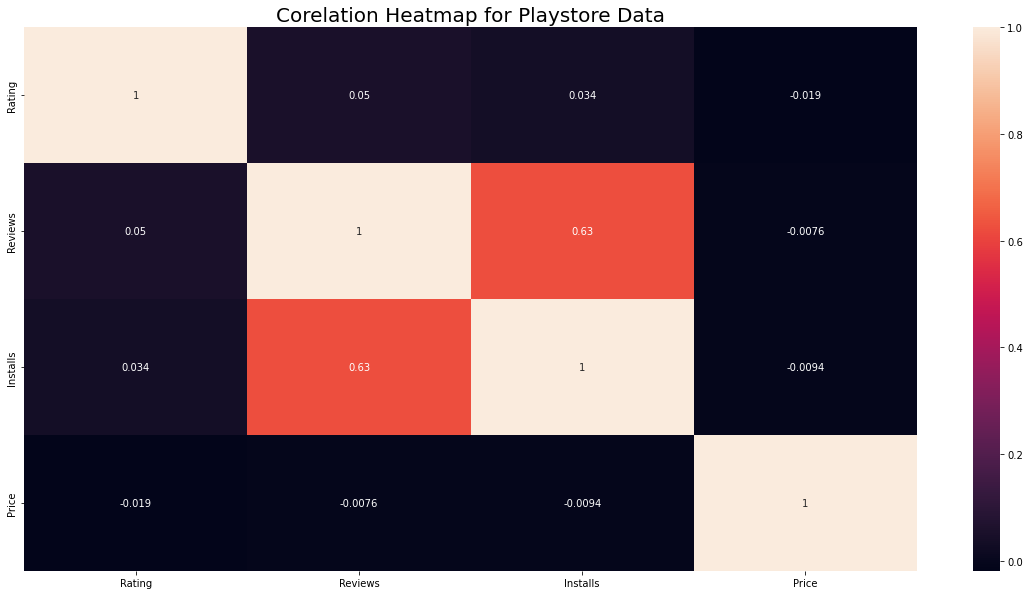

In [46]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(ps_df.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

##### 1. What is/are the insight(s) found from the chart?

**Answer :-** The` Rating` is slightly positively correlated with the` Installs and Reviews` column. This indicates that as the the average user rating increases, the app installs.


##### 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :-**There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.

The` Price `is slightly negatively correlated with the `Rating, Reviews, and Installs.` This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.

## **2). What is the ratio of number of Paid apps and Free apps?**


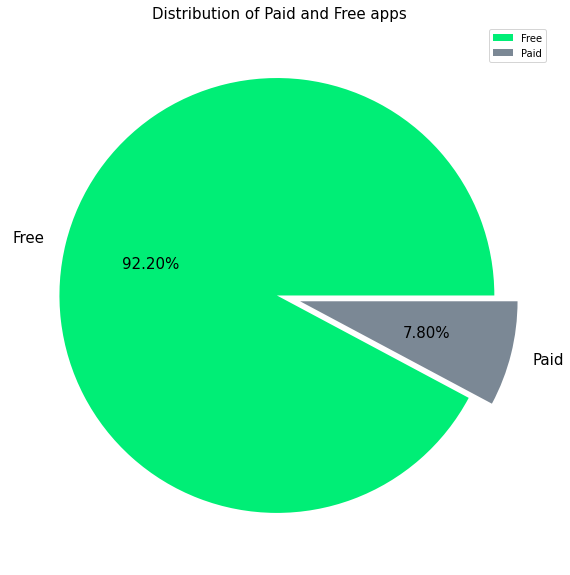

In [47]:
data = ps_df['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

##### 1. Why did you pick the specific chart?

**Answer:-**Pie chart clear the easy visualization in the ratio term.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-** From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

## **3).  Which category of Apps from the Content Rating column are found more on playstore ?**

In [48]:
ps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

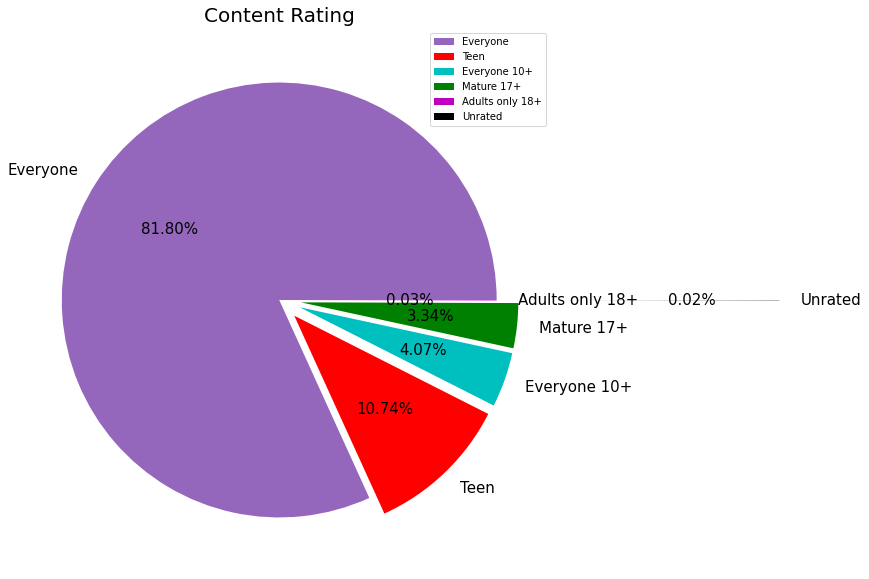

In [49]:
# Content rating of the apps
data = ps_df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

##### 1. Why did you pick the specific chart?

**Answer:-**Pie chart clear the easy visualization in the ratio term.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**A majority of the apps (82%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.Answer Here

## **4). What is Top Categories in App?**

In [50]:
ps_df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [51]:
x = ps_df['Category'].value_counts()
y = ps_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

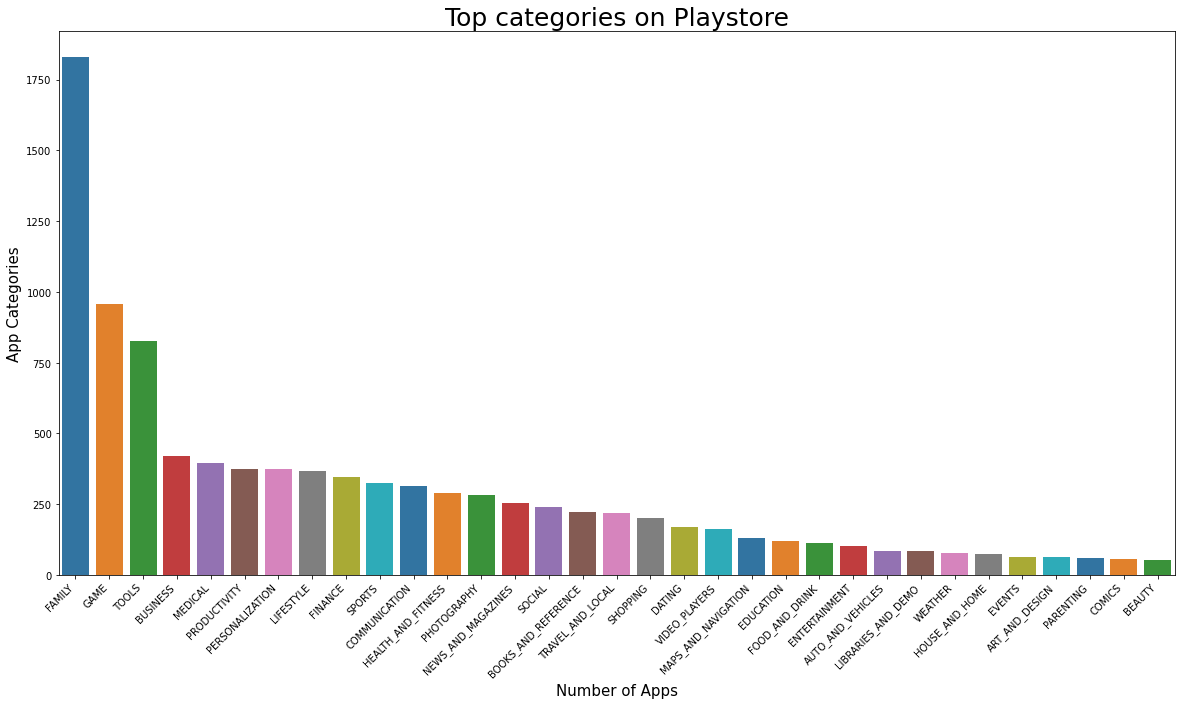

In [52]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

##### 1. Why did you pick the specific chart?

**Answer:-** Column Chart showing visualization more effective for categories because number of categories are 33.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**There are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are underFAMILY & GAME category and least are of EVENTS & BEAUTY Category.


### **`5). Which category App's have most number of installs?`**

Text(0.5, 1.0, 'Total app installs in each category')

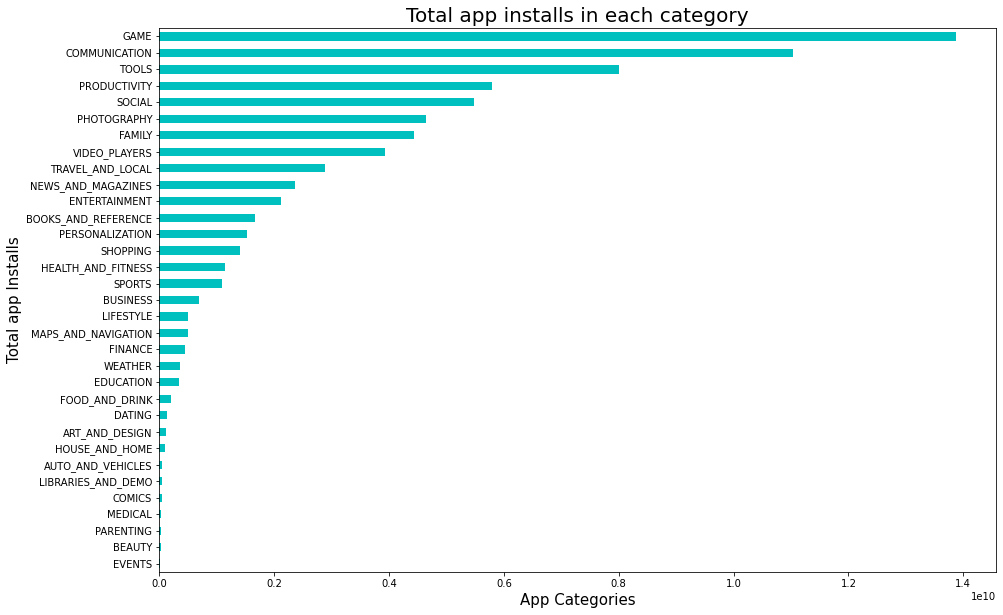

In [53]:
# total app installs in each category of the play store

a = ps_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

**Findings:-**This tells us the category of apps that has the maximum number of installs. The `Game,` `Communication and Tools` categories has the highest number of installs compared to other categories of apps.

### **5). Average rating of the apps**

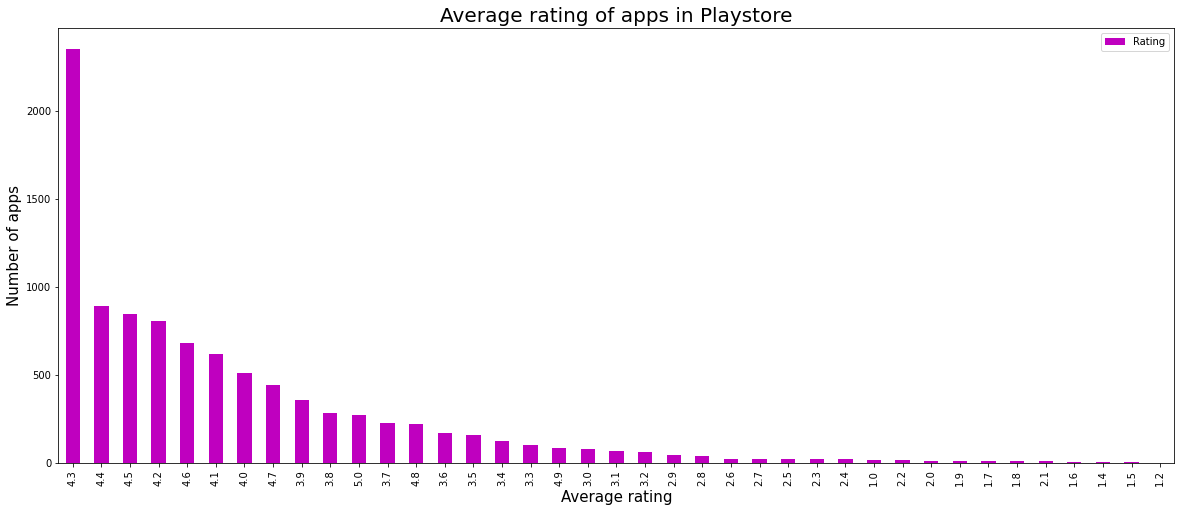

In [54]:
# Average app ratings

ps_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:

* 4-5: Top rated
* 3-4: Above average
* 2-3: Average
* 1-2: Below average

**Lets create a new column `Rating group` in the main dataframe and apply these filters.**

In [55]:
def Rating_app(val):
  ''''
  This function help to categories the rating from 1 to 5
  as Top_rated,Above_average,Average & below Average
  '''
  if val>=4:
    return 'Top rated'
  elif val>3 and val<4:
    return 'Above Average'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Below Average'

# Applying grouped_rating function
ps_df['Rating_group']=ps_df['Rating'].apply(lambda x: Rating_app(x))

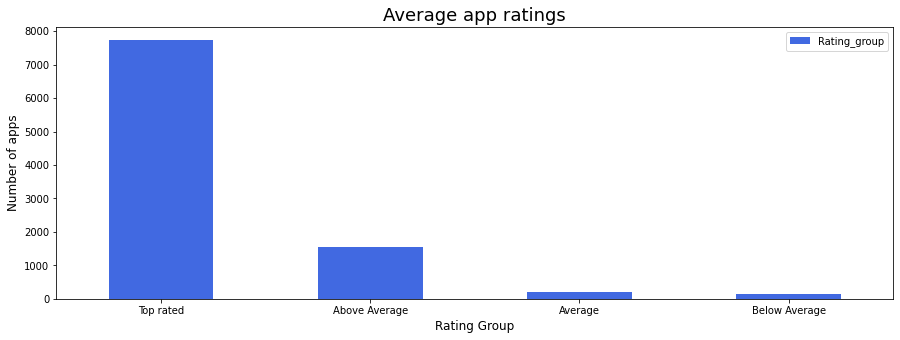

In [56]:
# Average app ratings 
ps_df['Rating_group'].value_counts().plot.bar(figsize=(15,5), color = 'royalblue')
plt.xlabel('Rating Group', fontsize = 12)
plt.ylabel('Number of apps', fontsize = 12)
plt.title('Average app ratings', fontsize = 18)
plt.xticks(rotation=0)
plt.legend()

### **7). What are the Top 10 installed apps in any category?**

In [57]:
def findtop10incategory(str):
    str = str.upper()
    top10 = ps_df[ps_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

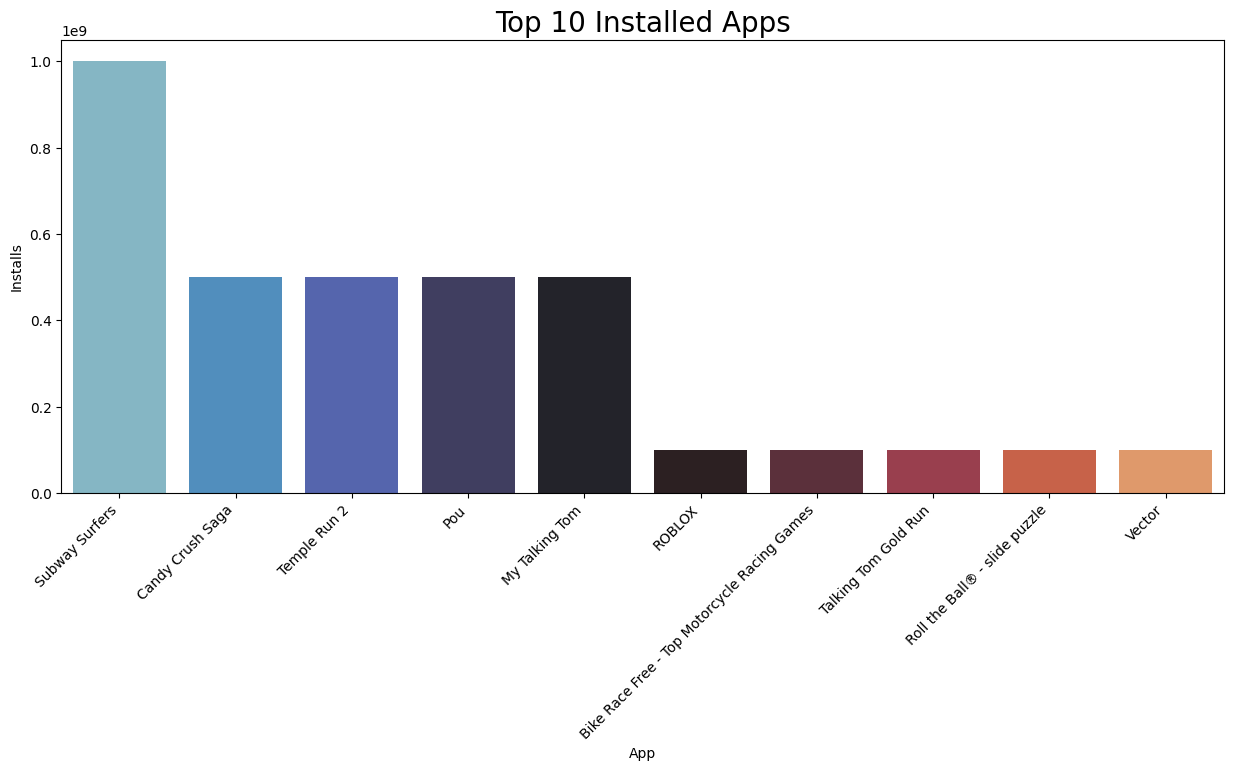

In [58]:
findtop10incategory('GAME')

**Findings:**

From the above graph we can see that in the **`Game category Subway Surfers,Candy Crush Saga, Temple Run 2`** has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.

### **8). Top apps that are of free type.**

In [59]:
# Creating a df for top free apps
top_free_df = ps_df[ps_df['Installs'] == ps_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,Above Average
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top rated
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top rated
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top rated
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,Top rated
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,Top rated
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top rated
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,Top rated
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,Top rated
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,Top rated


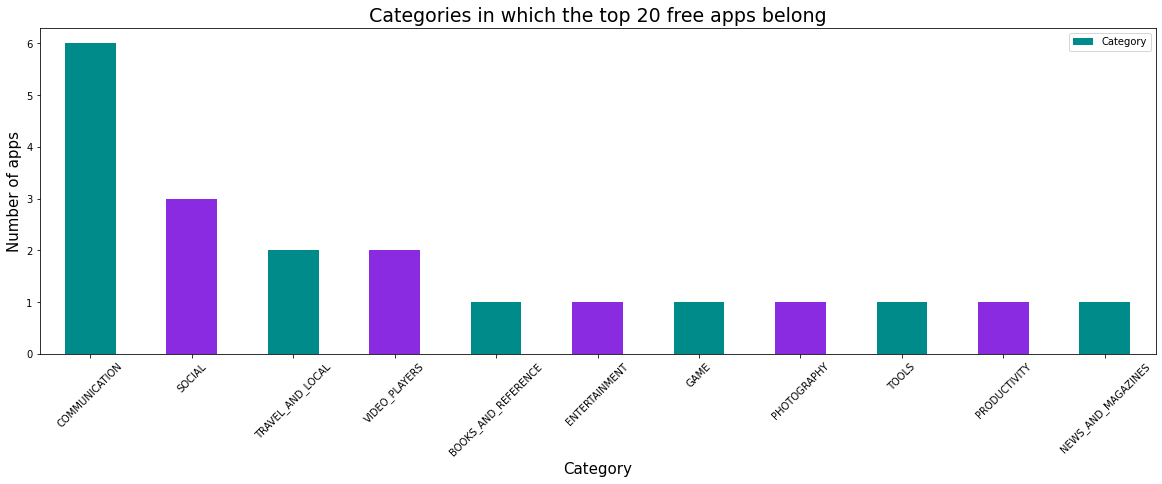

In [60]:
# Categories in which the top 20 free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()


### **9). Top apps that are of paid type.**

In [61]:
# Creating a df containing only paid apps
paid_df=ps_df[ps_df['Type']=='Paid']

<AxesSubplot:xlabel='Price'>

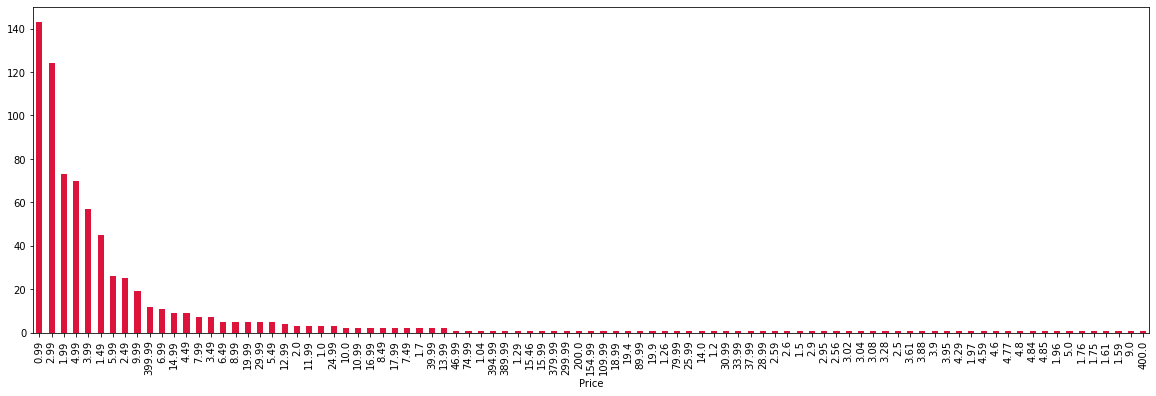

In [62]:
# Number of apps that can be installed at a particular price 
paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

* The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
* Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
* This is given by:

 Revenue generated through installs = (Number of installs)x(Price to install the app)

In [63]:
# Creatng a new column 'Revenue' in paid_df
paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,Top rated,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,Top rated,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,Top rated,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,Top rated,39900.0
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,Average,6990.0


In [64]:
# Top app in the paid category
paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,Revenue
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,Top rated,69900000.0


In [65]:
# Top 10 paid apps in the play store
top10paid_apps=paid_df.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

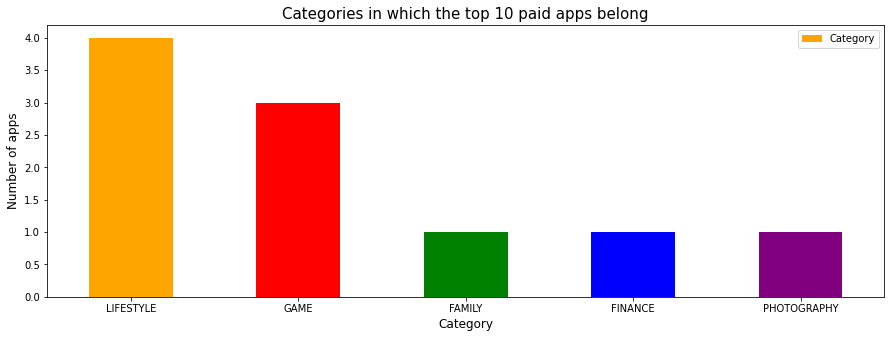

In [66]:
# Categories in which the top 10 paid apps belong to
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color= ["orange", "red", "green", "blue", "purple"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

### **10). Distribution of apps based on its size**#### 

Lets group the data in the size column as follows into intervals of 10 each:

(< 1 MB, 1-10, 10-20, 20-30, ..., 90-100, 'Varies with device')


In [67]:
# Function to group the apps based on its size in MB

def size_apps(var):
  '''
  This function groups the size of an app 
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

ps_df['size_group']=ps_df['Size'].apply(lambda x : size_apps(x))
ps_df.head()    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,size_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top rated,10-20
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,10-20
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top rated,1-10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top rated,20-30
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Top rated,1-10


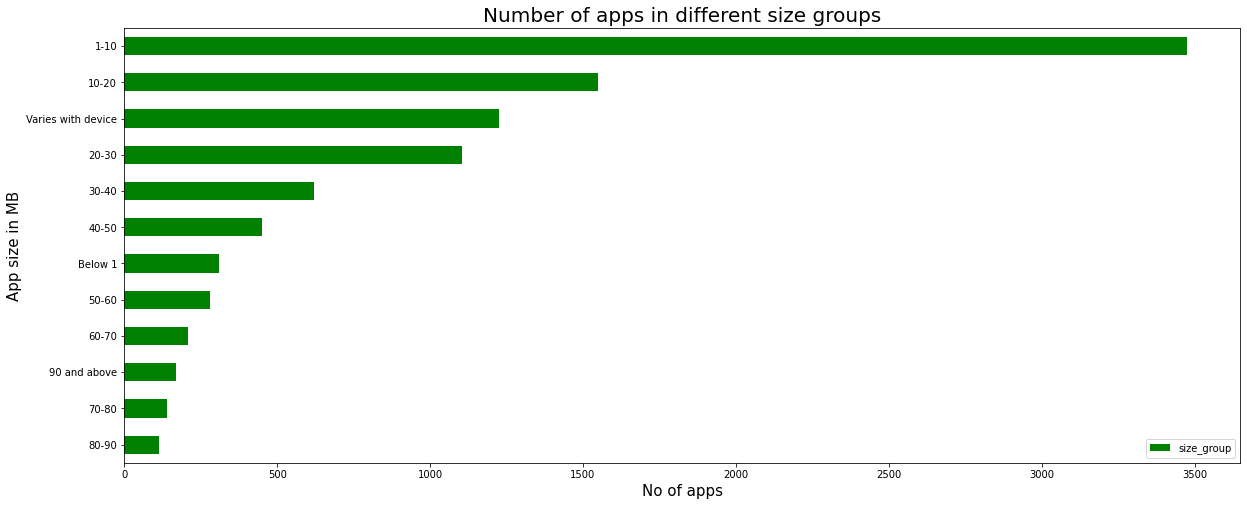

In [68]:
# no of apps belonging to each size group
ps_df['size_group'].value_counts().plot.barh(figsize=(20,8),color='g').invert_yaxis()
plt.title("Number of apps in different size groups", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('No of apps', size=15)
plt.legend()

*   The sizes of the majority of the apps range in between 1 and 20 MB.
*   There are a good number of apps whose size varies with the device.

## **Data Visualization on User Reviews:**
### **`1). Percentage of Review Sentiments`**

In [69]:
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

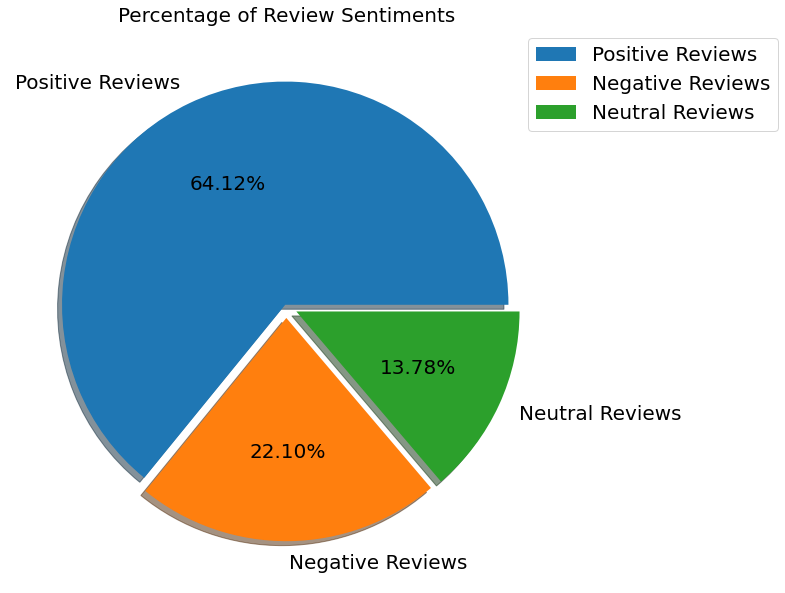

In [70]:
import matplotlib
counts = list(ur_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

**Findings:**

1. Positive reviews are **64.30%**
2. Negative reviews are **22.80%**
3. Neutral reviews are **12.90%**

### **`2). Apps with the highest number of positive reviews`**

In [71]:
# positive reviews
positive_ur_df=ur_df[ur_df['Sentiment']=='Positive']
positive_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


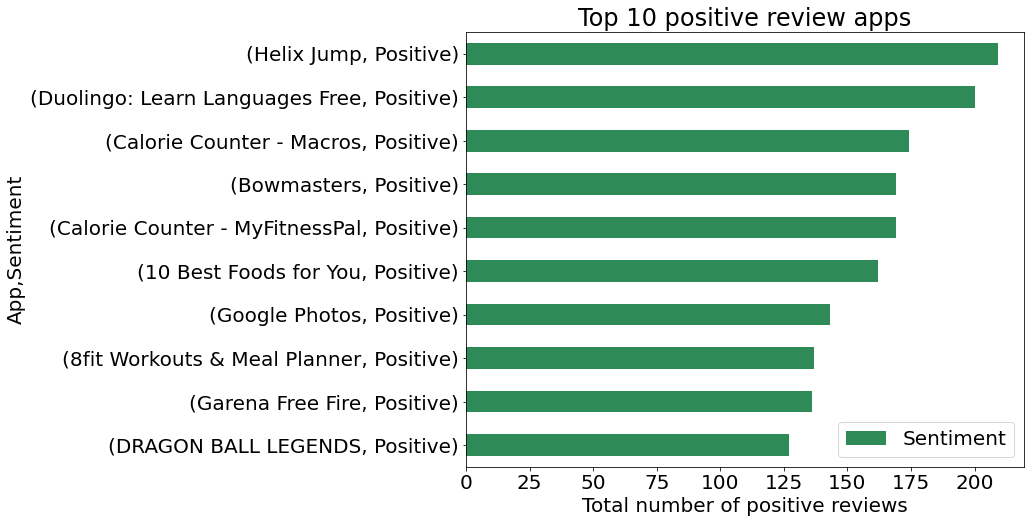

In [72]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

### **`3). Apps with the highest number of negative reviews.`**

In [73]:
negative_ur_df=ur_df[ur_df['Sentiment']=='Negative']
negative_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


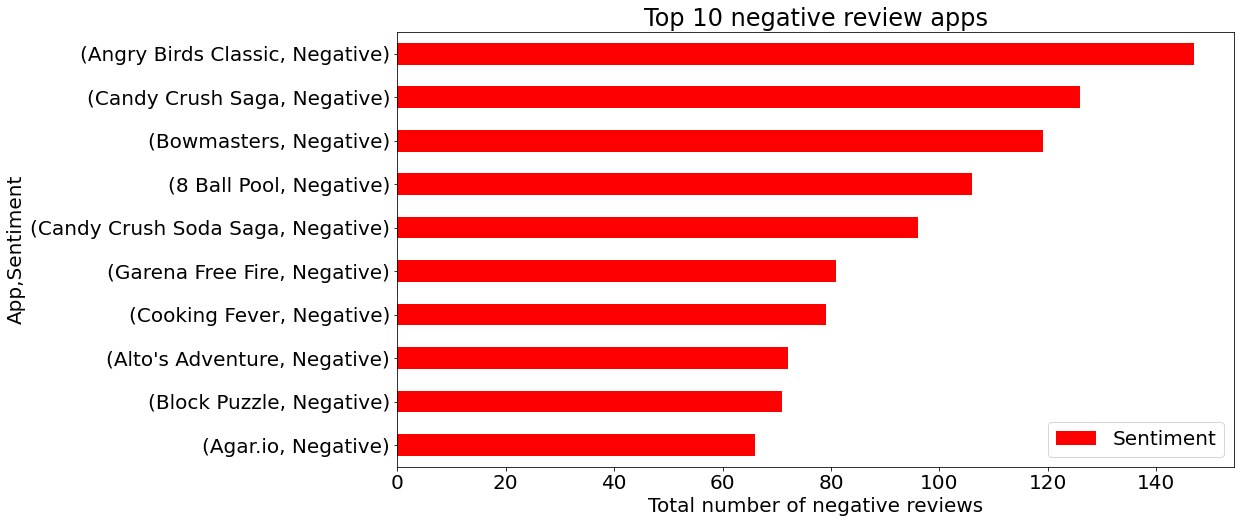

In [74]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='r').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

### **`4). Histogram of Subjectivity`**

In [75]:
ur_df.Sentiment_Subjectivity.value_counts()

0.000000    4411
1.000000    1749
0.500000    1647
0.600000    1166
0.750000    1140
            ... 
0.616909       1
0.234848       1
0.154762       1
0.591146       1
0.259470       1
Name: Sentiment_Subjectivity, Length: 4474, dtype: int64

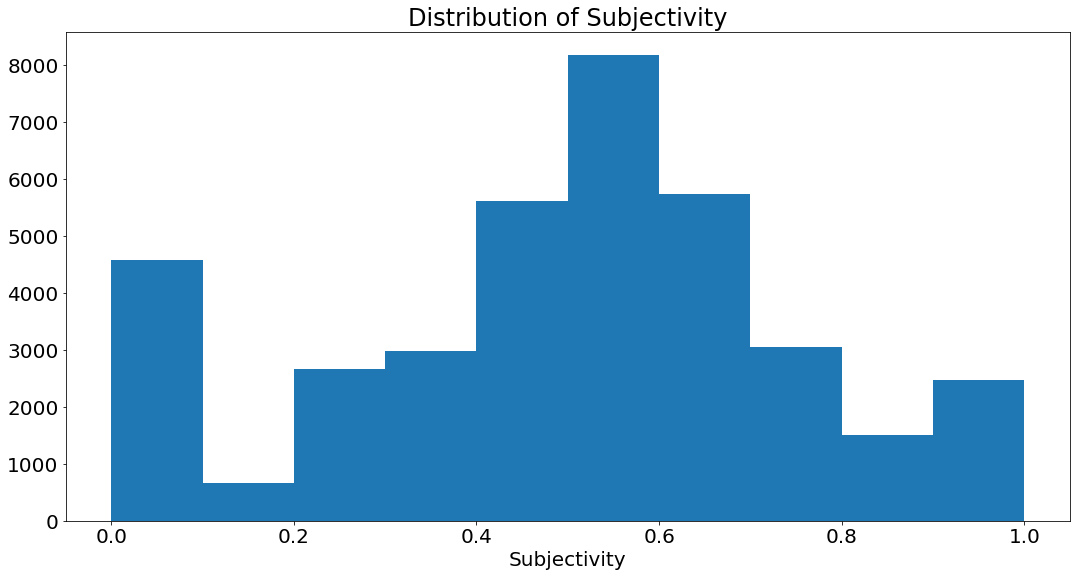

In [76]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(ur_df[ur_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

**Findings:**

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 



In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

* Percentage of free apps = ~92%
* Percentage of apps with no age restrictions = ~82%
* Most competitive category: Family
* Category with the highest average app installs: Game
* Percentage of apps that are top rated = ~80%
* Family, Game and Tools are top three categories having 1906, 926 and 829 app count. 
* There are 20 free apps that have been installed over a billion times.
* Category in which the paid apps have the highest average installation fee: Finance
* The apps whose size varies with device has the highest number average app installs.
* Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative 22% and Neutral 13%.

# **Conclusion**



In this project of analyzing play store applications, we have worked on several parameters which would help the client to do well in launching their apps on the play store.

Clients needs to focus more on:
1. Most of the apps are Free, so focusing on free app is more important.
2. Focusing more on content available for Everyone will increase the chances of getting the highest installs.
3. They need to focus on updating their apps regularly, so that it will attract more users.
5. They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***